In [2]:
# read the json file as a dataframe
df = pd.read_json("data/CETM47-23_24-AS2-Data.json")
df.head()

,text,date,label,id,label_name
0,The {@Clinton LumberKings@} beat the {@Cedar R...,2019-09-08,4,1170516324419866624,sports_&_gaming
1,I would rather hear Eli Gold announce this Aub...,2019-09-08,4,1170516440690176006,sports_&_gaming
2,"Someone take my phone away, I’m trying to not ...",2019-09-08,4,1170516543387709440,sports_&_gaming
3,"A year ago, Louisville struggled to beat an FC...",2019-09-08,4,1170516620466429953,sports_&_gaming
4,Anyone know why the #Dodgers #Orioles game nex...,2019-09-08,4,1170516711411310592,sports_&_gaming


In [3]:
df["label_name"].unique()

array(['sports_&_gaming', 'pop_culture', 'daily_life',
       'business_&_entrepreneurs', 'science_&_technology',
       'arts_&_culture'], dtype=object)

In [4]:
df["label_name"].value_counts(normalize=True)

label_name
pop_culture                 0.389880
sports_&_gaming             0.355580
daily_life                  0.137048
science_&_technology        0.050598
business_&_entrepreneurs    0.044544
arts_&_culture              0.022350
Name: proportion, dtype: float64

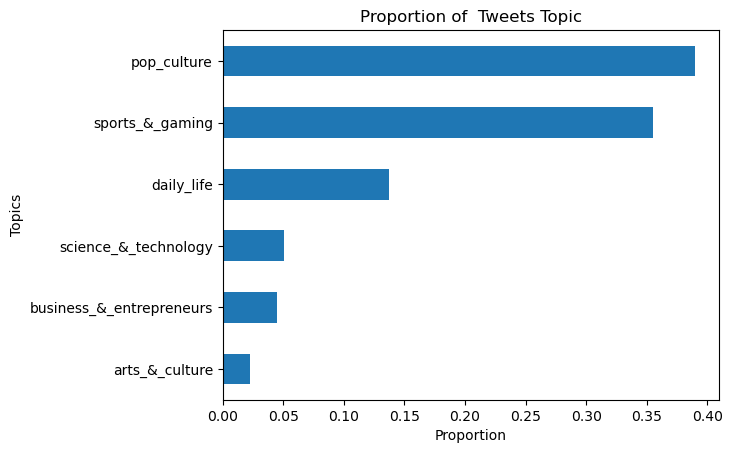

In [5]:
# topics proportion
df["label_name"].value_counts(normalize=True, ascending=True).plot.barh(title="Proportion of  Tweets Topic", xlabel="Proportion", ylabel="Topics");

### No of Words in Tweets

In [6]:
def count_words(text):
    tokens = word_tokenize(text)
    return len(tokens)

In [7]:
df["Word Frequency"] = df["text"].apply(count_words)

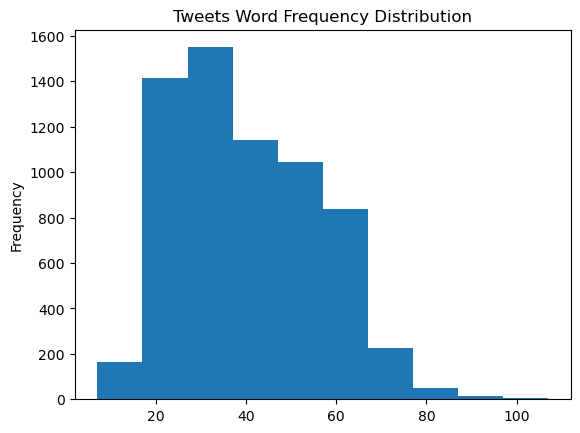

In [8]:
# Tweet words frequency distribution
df["Word Frequency"].plot.hist(title="Tweets Word Frequency Distribution");

### Word Cloud Analysis

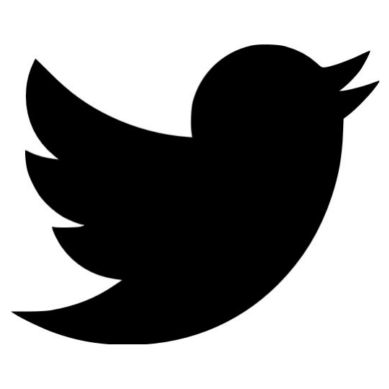

In [9]:
# Import Twitter Logo
image = np.array(Image.open('twitter.jpg'))
plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') # Display data as an image
plt.axis('off');

In [10]:
def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

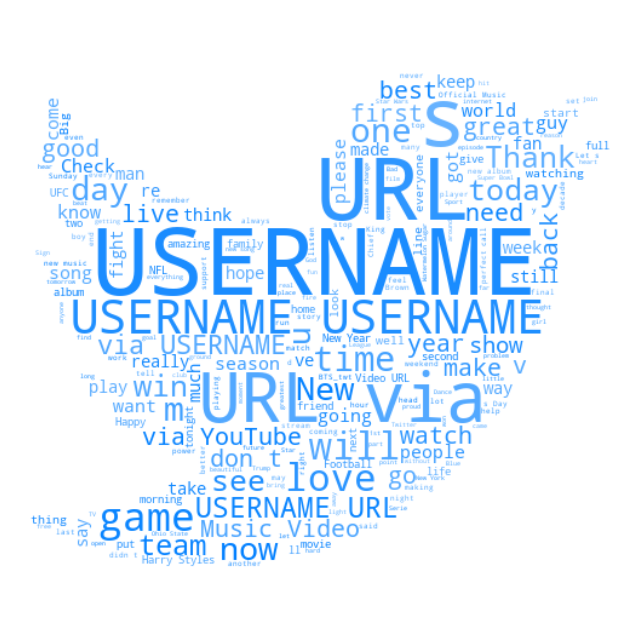

In [11]:
# word cloud analysis
wordcloud = WordCloud(max_words=1000, mask=image, background_color="white", random_state=42).generate_from_text(" ".join(df["text"].tolist()))
plt.figure(figsize=(8, 10))
plt.imshow(wordcloud.recolor(color_func=blue_color_func, random_state=3), interpolation='bilinear')
plt.axis("off");

## Data Cleaning

In [12]:
df.head()

,text,date,label,id,label_name,Word Frequency
0,The {@Clinton LumberKings@} beat the {@Cedar R...,2019-09-08,4,1170516324419866624,sports_&_gaming,55
1,I would rather hear Eli Gold announce this Aub...,2019-09-08,4,1170516440690176006,sports_&_gaming,19
2,"Someone take my phone away, I’m trying to not ...",2019-09-08,4,1170516543387709440,sports_&_gaming,25
3,"A year ago, Louisville struggled to beat an FC...",2019-09-08,4,1170516620466429953,sports_&_gaming,64
4,Anyone know why the #Dodgers #Orioles game nex...,2019-09-08,4,1170516711411310592,sports_&_gaming,54


In [13]:
# extract the relevant features
df = df[["text", "label"]]

In [14]:
df.head()

,text,label
0,The {@Clinton LumberKings@} beat the {@Cedar R...,4
1,I would rather hear Eli Gold announce this Aub...,4
2,"Someone take my phone away, I’m trying to not ...",4
3,"A year ago, Louisville struggled to beat an FC...",4
4,Anyone know why the #Dodgers #Orioles game nex...,4


In [15]:
## check for duplicates
df[df.duplicated(subset=["text"])]

,text,label
5898,I just earned the The Dark Side (Level 2) ba...,4


In [16]:
# drop the duplicates
df.drop_duplicates(subset=["text"], inplace=True)

## Data Preprocessing -- NLP Techniques Application

### Remove Username, URL and User Mention Place holder

In [17]:
def remove_placeholders(text):
    """
    This function takes the text column and then removes
    username, URL and User mention placeholder from the text.

    Parameter:
        text

    Returns:
        -- cleaned text
    """

    # remove user mentions
    cleaned_text = re.sub(r"\{@[^\{\}]*\}", "", text)

    # remove url and username placeholder
    cleaned_text = re.sub(r"\{\{[^\{\}]*\}\}", "", cleaned_text)

    return cleaned_text

In [18]:
df["text"] = df["text"].apply(remove_placeholders)

In [19]:
df.head()

,text,label
0,The beat the 4-0 in Game 1 of the Western Di...,4
1,I would rather hear Eli Gold announce this Aub...,4
2,"Someone take my phone away, I’m trying to not ...",4
3,"A year ago, Louisville struggled to beat an FC...",4
4,Anyone know why the #Dodgers #Orioles game nex...,4


### Lower Case

In [20]:
# lower case the case
df["text"] = df["text"].str.lower()

### Remove Stopwords, Digits and Punctuations

In [21]:
## Replace right quotation mark to apostrophe to that contraction can be dropped

df["text"] = df["text"].str.replace('’', "'")

In [22]:
english_stopwords = STOPWORDS

In [23]:
# split the document into tokens using space not word_tokenize
df["text"] = df["text"].apply(lambda document: " ".join([token for token in document.split(" ") if token not in english_stopwords]))

In [24]:
df.head()

,text,label
0,beat 4-0 game 1 western division finals. eva...,4
1,rather hear eli gold announce auburn game dumb...,4
2,"someone take phone away, trying look home gam...",4
3,"year ago, louisville struggled beat fcs oppone...",4
4,anyone know #dodgers #orioles game next thursd...,4


In [25]:
## Example of using word tokenize instead

# document = "This is a sentence with a lot of contraction such as 'mustn't, isn't. I hate contraction don't I"
# print(document)
# print("\n")
# tokens = word_tokenize(document)
# print(tokens)

# cleaned_text = " ".join([token for token in tokens if token.lower() not in english_stopwords])
# print("\n")
# print(cleaned_text)

In [26]:
df.head()

,text,label
0,beat 4-0 game 1 western division finals. eva...,4
1,rather hear eli gold announce auburn game dumb...,4
2,"someone take phone away, trying look home gam...",4
3,"year ago, louisville struggled beat fcs oppone...",4
4,anyone know #dodgers #orioles game next thursd...,4


In [27]:
def preprocess_corpus(text):
    """
    This function preprocess the text by removing digit and punctuation.

    Parameter:
        -- text: the text
    Returns:
        -- cleaned text
    """
    words = [token for token in word_tokenize(text) if token not in punctuation and not token.isdigit()]

    return " ".join(words)

In [28]:
df["text"] = df["text"].apply(preprocess_corpus)

In [29]:
df.head()

,text,label
0,beat 4-0 game western division finals evan edw...,4
1,rather hear eli gold announce auburn game dumb...,4
2,someone take phone away trying look home game ...,4
3,year ago louisville struggled beat fcs opponen...,4
4,anyone know dodgers orioles game next thursday...,4


### Remove Emojis and Unicode Characters

In [33]:
# remove emoji and unicode character
df["text"] = df["text"].apply(lambda x: "".join(c for c in x if c.isascii()))

# Base NLP Pipeline

In [34]:
#split dataset into training and test set
X = df["text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# pipeline
base_pipeline = Pipeline(
    [
        ("count_vectorizer", CountVectorizer()),
        ("linear_svc", LinearSVC())
    ]
)

base_pipeline.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('linear_svc', LinearSVC())])

In [36]:
print(classification_report(y_test, base_pipeline.predict(X_test), digits=3));

              precision    recall  f1-score   support

           0      0.538     0.259     0.350        27
           1      0.667     0.316     0.429        57
           2      0.794     0.829     0.811       497
           3      0.612     0.575     0.593       181
           4      0.833     0.895     0.863       478
           5      0.587     0.551     0.568        49

    accuracy                          0.773      1289
   macro avg      0.672     0.571     0.602      1289
weighted avg      0.764     0.773     0.764      1289



# Better Text Representation


#### Reducing Number of Dimensionality using Lemmatization or Stemming 

#### Creating a Lemmatization Transformer

In [37]:
def get_pos_tag(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:         
        return wordnet.NOUN

In [39]:
class Lemmatizer(BaseEstimator, TransformerMixin):
    """
    This Class creates a Lemmatization Transformer
    So that lemmatization can work with the pipeline
    """

    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()

    def fit(self, X, y=None):
        return self
    def transform(self, X):
        lemmatized_X = []
        for document in X:
            tokens = word_tokenize(document)
            pos_tags = pos_tag(tokens)
            
            lemmatized_tokens = [self.lemmatizer.lemmatize(word = token, pos = get_pos_tag(tag)) for token, tag in pos_tags]
    
            lemmatized_sentence = " ".join(lemmatized_tokens)

            lemmatized_X.append(lemmatized_sentence)
        return lemmatized_X

In [41]:
# pipeline
nlp_pipeline = Pipeline(
    [
        ("lemmatization", Lemmatizer()),
        ("count_vectorizer", CountVectorizer()),
        ("linear_svc", LinearSVC())
    ]
)

nlp_pipeline.fit(X_train, y_train)

Pipeline(steps=[('lemmatization', Lemmatizer()),
                ('count_vectorizer', CountVectorizer()),
                ('linear_svc', LinearSVC())])

In [43]:
print(classification_report(y_test, nlp_pipeline.predict(X_test), digits=3));

              precision    recall  f1-score   support

           0      0.615     0.296     0.400        27
           1      0.677     0.368     0.477        57
           2      0.799     0.839     0.818       497
           3      0.629     0.608     0.618       181
           4      0.849     0.893     0.871       478
           5      0.622     0.571     0.596        49

    accuracy                          0.784      1289
   macro avg      0.699     0.596     0.630      1289
weighted avg      0.778     0.784     0.777      1289



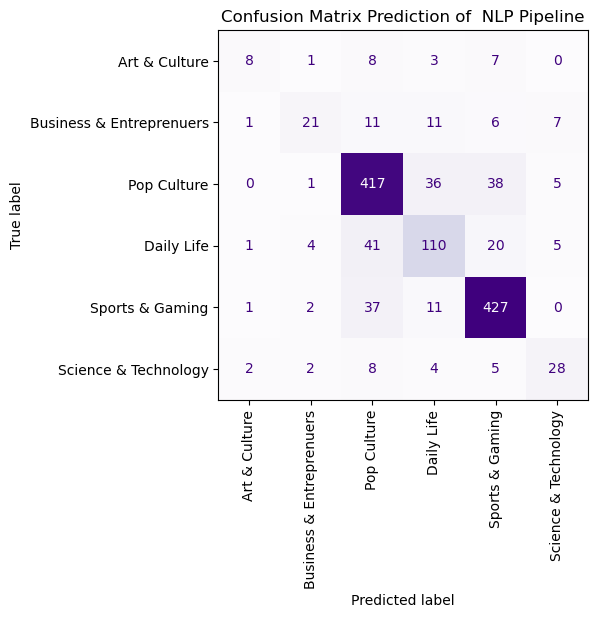

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, nlp_pipeline.predict(X_test), 
                                        colorbar=False,
                                        display_labels=["Art & Culture", "Business & Entreprenuers",
                                                        "Pop Culture", "Daily Life", "Sports & Gaming",
                                                        "Science & Technology"],
                                        xticks_rotation = "vertical",
                                        cmap="Purples")
plt.title("Confusion Matrix Prediction of  NLP Pipeline");

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
cross_val_score(nlp_pipeline, X, y, cv=5)

array([0.74010861, 0.73622964, 0.74223602, 0.74301242, 0.74689441])